In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import cv2
# from tensorflow.keras.emotion_models import Sequential
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [3]:
path = '/kaggle/input/fer2013/train'
classes = os.listdir(path)
classes

['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']

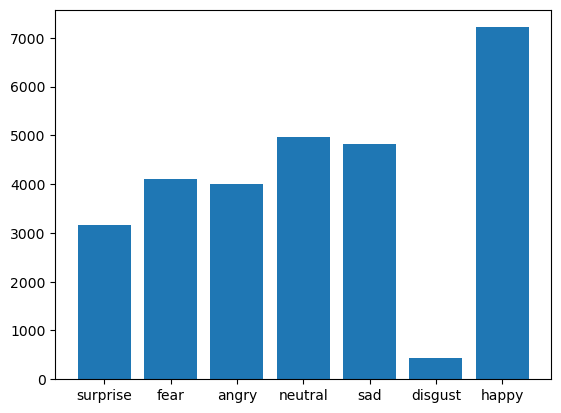

In [4]:
count = []
for c in classes:
    count.append(len(os.listdir(f'{path}/{c}')))
plt.bar(classes, count)
plt.show()

In [5]:
train_dir = '/kaggle/input/fer2013/train'
val_dir = '/kaggle/input/fer2013/test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [6]:
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

In [7]:
emotion_model.save('model1.h5')
emotion_model.save_weights('model.h5')

In [8]:
emotion_model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])

emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=28709 // 64,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=7178 // 64)

/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100


2023-04-16 16:29:14.842952: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


448/448 [==============================] - 169s 363ms/step - loss: 1.7932 - accuracy: 0.2653 - val_loss: 1.6835 - val_accuracy: 0.3665
Epoch 2/100
448/448 [==============================] - 31s 70ms/step - loss: 1.6149 - accuracy: 0.3733 - val_loss: 1.5359 - val_accuracy: 0.4100
Epoch 3/100
448/448 [==============================] - 32s 72ms/step - loss: 1.5220 - accuracy: 0.4166 - val_loss: 1.4569 - val_accuracy: 0.4453
Epoch 4/100
448/448 [==============================] - 33s 73ms/step - loss: 1.4578 - accuracy: 0.4434 - val_loss: 1.4124 - val_accuracy: 0.4552
Epoch 5/100
448/448 [==============================] - 32s 71ms/step - loss: 1.3998 - accuracy: 0.4640 - val_loss: 1.3600 - val_accuracy: 0.4817
Epoch 6/100
448/448 [==============================] - 32s 71ms/step - loss: 1.3509 - accuracy: 0.4870 - val_loss: 1.3185 - val_accuracy: 0.5015
Epoch 7/100
448/448 [==============================] - 32s 71ms/step - loss: 1.3062 - accuracy: 0.5057 - val_loss: 1.2843 - val_accuracy: 0.

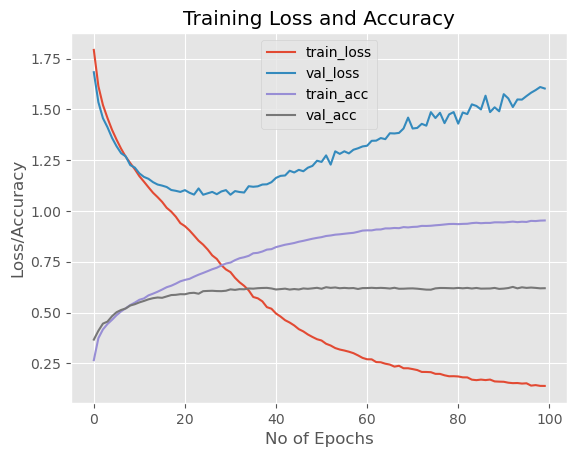

In [9]:
plt.style.use("ggplot")
N = 100
plt.plot(np.arange(0,N), emotion_model_info.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), emotion_model_info.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), emotion_model_info.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), emotion_model_info.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("No of Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend()#loc="upper right"
plt.show()


In [10]:
emotion_model.save('model1.h5')
emotion_model.save_weights('model.h5')